## Laboratorium 2

In [3]:
import numpy as np
import time
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from itertools import combinations, groupby
from copy import deepcopy


### Zadanie 1

In [4]:
def findMax(tab, l):  # return iterator
    max_num = float("-inf")
    current_i = l

    for i in range(l, len(tab)):
        if tab[i][l] > max_num:
            current_i = i
            max_num = tab[i][l]

    return current_i


In [5]:
def solverGaussJordan(A, B):
    n = len(A)

    a = A.copy()
    b = B.copy()

    a = np.column_stack((a, b))

    for i in range(n):
        switch_i = findMax(a, i)
        a[[i, switch_i], :] = a[[switch_i, i], :]
        # print(a)

        for k in range(i):
            # print(i)
            a[k] = (-1) * (a[k][i] / a[i][i]) * a[i] + a[k]
            a[k][i] = 0.0

        for k in range(i + 1, n):
            a[k] = (-1) * (a[k][i] / a[i][i]) * a[i] + a[k]
            a[k][i] = 0.0
    for i in range(n):
        tmp = a[i][i]
        a[i][n] /= tmp
        a[i][i] /= tmp

    solve = np.ones((n, 1), dtype=np.float64)
    for i in range(n):
        solve[i][0] *= a[i][n]
    # print(a) # skasować gdy 500 albo wiecej
    return solve


In [6]:
a = np.array([(1, 2, 3), (4, 5, 6), (7, 8, 9)], dtype=np.float64)
b = np.array([(1,), (2,), (3,)], np.float64)

# Dla 500
# A = np.random.uniform(0,10, (500, 500))
# B = np.random.uniform(0,10, (500,1))

A = np.random.uniform(0, 10, (3, 3))
B = np.random.uniform(0, 10, (3, 1))


In [7]:
def gaussJordanTimes(a, b):
    time_s = 0
    n = len(a)
    # print(n)

    time_s = time.perf_counter()
    result1 = solverGaussJordan(a, b)
    time_gs = time.perf_counter() - time_s

    time_s = time.perf_counter()
    result2 = np.linalg.solve(a, b)
    time_np_solve = time.perf_counter() - time_s

    if np.allclose(result1, result2):
        print(
            "Times for {length}x{length} matrix: \n\
GaussJordan solve: {GJ}   numpy solve: {np_solve}".format(
                length=n, GJ=time_gs, np_solve=time_np_solve
            )
        )

    else:
        print("Błędnie wyliczony wynik.")


In [8]:
result1 = solverGaussJordan(A, B)
np_result1 = np.linalg.solve(A, B)
print(np.allclose(np_result1, result1))
print(result1)


True
[[ 4.24841575]
 [-3.68845708]
 [ 1.87590199]]


Porównanie czasu wykonania własno-zaimplementowanego algorytmu z algorytmem z biblioteki numpy


In [9]:
n = 100
table_len = 15
A = [
    np.random.randint(0, 100, (n * i, n * i)).astype(np.float64)
    for i in range(1, table_len + 1)
]
B = [
    np.random.randint(0, 100, (n * i, 1)).astype(np.float64)
    for i in range(1, table_len + 1)
]


In [24]:
for i in range(table_len):
    gaussJordanTimes(A[i], B[i])


Times for 100x100 matrix: 
GaussJordan solve: 0.04940376099693822   numpy solve: 0.007131532001949381
Times for 200x200 matrix: 
GaussJordan solve: 0.1923043329952634   numpy solve: 0.03221687400218798
Times for 300x300 matrix: 
GaussJordan solve: 0.3639812740002526   numpy solve: 0.07934849799494259
Times for 400x400 matrix: 
GaussJordan solve: 0.6778506709961221   numpy solve: 0.1314505639966228
Times for 500x500 matrix: 
GaussJordan solve: 1.066565916997206   numpy solve: 0.0077311860004556365
Times for 600x600 matrix: 
GaussJordan solve: 1.5990696270018816   numpy solve: 0.02043770499585662
Times for 700x700 matrix: 
GaussJordan solve: 2.240836890996434   numpy solve: 0.007928277002065443
Times for 800x800 matrix: 
GaussJordan solve: 3.1222133910050616   numpy solve: 0.031608698998752516
Times for 900x900 matrix: 
GaussJordan solve: 4.369718711997848   numpy solve: 0.26409785500436556
Times for 1000x1000 matrix: 
GaussJordan solve: 5.329039288997592   numpy solve: 0.021423370002594

### Zadanie 2 - faktoryzacja

In [11]:
def factorization(A):
    a = A.copy().astype(np.float64)
    n = len(A)
    for i in range(n):
        for j in range(i + 1, n):
            x = a[j][i] / a[i][i]
            a[j, i:] = (-1) * x * a[i, i:] + a[j, i:]
            a[j][i] = x
    L = np.tril(a)
    np.fill_diagonal(L, 1)
    U = np.triu(a)
    return L, U


Testowanie poprawności faktoryzacji macierzy

In [12]:
matrix1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=np.float64)


In [13]:
matrix2 = np.array([[2, 2, 2], [4, 7, 7], [6, 18, 22]], dtype=np.float64)


In [14]:
l1, u1 = factorization(matrix1)
np.allclose(matrix1 - l1 @ u1, np.zeros((3, 3)))


True

In [15]:
print(l1)
print(u1)


[[1. 0. 0.]
 [4. 1. 0.]
 [7. 2. 1.]]
[[ 1.  2.  3.]
 [ 0. -3. -6.]
 [ 0.  0.  0.]]


In [16]:
l2, u2 = factorization(matrix2)
np.allclose(matrix2 - l2 @ u2, np.zeros((3, 3)))


True

### Zadanie 3 - analiza obwodu elektrycznego


Loading graph from file - graph will we stored as list of lists and list of dictionaries to simplify searching through graph.

In [5]:
def loadGraph(filename: str):
    with open(filename, "r") as file:
        n = int(file.readline())

        graph = [[] for i in range(n)]
        dict_graph = [dict() for i in range(n)]
        # sem = file.readline().split()
        # S, T, E = int(sem[0]) - 1, int(sem[1]) - 1, int(sem[2])
        lines = file.readlines()
        for line in lines:
            s = line.split()
            if len(s) < 3:
                continue
            u = int(s[0]) - 1
            v = int(s[1]) - 1
            cost = float(s[2])
            if v not in dict_graph[u]:
                dict_graph[u][v] = [cost, None]
                dict_graph[v][u] = [cost, None]
                graph[u].append([v, cost])
                graph[v].append([u, cost])
            # di_graph[u].append([v, cost, None])
    # graph[S].append([T, E])
    # graph[T].append([S, E])
    # di_graph[S][T] = [E, None, 0]
    # di_graph[T][S] = [E, None, 0]

    return graph, dict_graph


Loading additional triplet (s, t, E), where *s* i *t* are nodes, between these a SEM of E value was applied

In [6]:
def loadSEM(s, t, E, graph_org, dict_graph_org):
    graph = deepcopy(graph_org)
    dict_graph = deepcopy(dict_graph_org)
    for i in graph[s]:
        if i[0] == t:
            i[1] = E
            for j in graph[t]:
                if j[0] == s:
                    j[1] = E
            dict_graph[s][t] = [E, None]
            dict_graph[t][s] = [E, None]
            break

    else:
        graph[s].append([t, E])
        graph[t].append([s, E])
        dict_graph[s][t] = [E, None]
        dict_graph[t][s] = [E, None]
    # return new graphs with SEM
    return graph, dict_graph


Prescribing resolved graph to networkx library for simpler drawning.

In [92]:
def graphToNx(graph, s, t, flag=True):
    fig, ax1 = plt.subplots(figsize=(10, 10))

    G = nx.DiGraph()
    n = len(graph)
    max_weigh = 0
    cost_tab = []

    labels = {}
    # if flag:
    for i in range(n):
        for j, cost in graph[i]:
            G.add_edge(i, j, weight=cost)
            cost_tab.append(cost)
            max_weigh = max(cost, max_weigh)

    # else:
    #     # H = nx.random_regular_graph(3, 500)
    #     G = nx.fast_gnp_random_graph(50, 0.3, directed=True)
    #     # G = nx.grid_2d_graph(5, 5)
    #     # G = H.to_directed()
    #     for u, v in G.edges():
    #         x = random.randint(0, 10)
    #         max_weigh = max(x, max_weigh)
    #         G.edges[u, v]["weight"] = x
    # pos = nx.planar_layout(G)
    # pos = nx.spring_layout(G)
    # pos = nx.layo(G)
    if flag:
        pos = nx.circular_layout(G)
    else:
        pos = nx.spring_layout(G)

    # print(nx.cycle_basis(G,s))
    for node in G.nodes():
        labels[node] = node
    # bounds = np.linspace(0, max_weigh, int(min(max_weigh + 1, 255)))
    # tickks = np.linspace(0, max_weigh, int(min(10, max_weigh + 1)))

    # print("Witam",np.mean(cost_tab))
    x = int(min(max_weigh + 10, 255))
    bounds = np.linspace(10e-7, max_weigh, x)
    # bounds = np.linspace(10e-7, max_weigh/5, 40)
    tickks = np.linspace(10e-7, max_weigh, min(20, x))

    cos = [0]
    # jakto = np.linspace(10e-5, max_weigh, 5)
    for i in range(len(bounds)):
        cos.append(bounds[i])
    bounds = cos

    cos2 = [0]
    # jakto = np.linspace(10e-5, max_weigh, 5)
    for i in range(len(tickks)):
        cos2.append(tickks[i])
    tickks = cos2

    # bounds = [0.5, 0.7, 1.5, 2]
    # tickks = np.linspace(0, max_weigh, 5)

    # tickks = bounds
    # tickks = [0.5, 0.7, 1.5, 2]

    # cmap = plt.cm.jet
    cmap = plt.cm.plasma_r
    # print(cmap.N)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])

    edges, weights = zip(*nx.get_edge_attributes(G, "weight").items())

    weights = list(weights)
    k = len(weights)
    for i in range(k):
        for j in range(len(bounds)):
            if weights[i] < bounds[j]:
                weights[i] = bounds[j]
                break
        else:
            weights[i] = bounds[-1]

    # nx.draw(G, pos = pos, width = 3, edge_color=weights, edge_cmap = cmap, with_labels = True, ax = ax1)
    nx.draw_networkx_nodes(
        G, pos=pos, ax=ax1, node_size=100, edgecolors="r", node_color="w"
    )
    nx.draw_networkx_edges(
        G,
        pos=pos,
        width=1.5,
        arrowstyle="->",
        arrowsize=5,
        edge_color=weights,
        edge_cmap=cmap,
        ax=ax1,
    )

    nx.draw_networkx_labels(G, pos, labels, font_size=6, font_color="r", ax=ax1)

    # print(nx.cycle_basis(G, 0))

    # nx.draw(G, with_labels=True)
    # nx.draw(G, with_labels = True, ax = ax1)
    # print(weights)
    cb = mpl.colorbar.ColorbarBase(
        ax2,
        cmap=cmap,
        norm=norm,
        spacing="proportional",
        ticks=tickks,
        boundaries=bounds,
        format="%.5f",
    )
    plt.show()
    # plt.savefig("graph.png", dpi=1000)


Finding basics cycles in graph - Paton's algorithm

In [8]:
def paton(G, root=None):
    nodes_of_graph = set(range(len(G)))
    # print(nodes_of_graph)
    cycles = []
    # checking all connected components
    while nodes_of_graph:
        if root is None:
            root = nodes_of_graph.pop()
        stack = [root]
        parent = {root: root}
        T = {root: set()}

        while stack:
            z = stack.pop()
            zused = T[z]
            for v, cost in G[z]:
                if v not in T:  # first time
                    T[v] = {z}
                    parent[v] = z
                    stack.append(v)
                elif v == z:  # self cycle
                    cycles.append([v])
                elif v not in zused:  # find cycle - node v in spanning tree
                    level = T[v]
                    cycle = [v, z]
                    p = parent[z]

                    while p not in level:
                        cycle.append(p)
                        p = parent[p]

                    cycle.append(p)
                    cycles.append(cycle)
                    T[v].add(z)

        nodes_of_graph -= set(parent)
        root = None
    # print(cycles)
    return cycles


Deviding power correspondingly with Kirchhoff's first law

In [9]:
def powerDivide(G, root):
    stack = [root]
    power_counter = 0

    def dfs(u, tmp_counter):
        # print("witam")
        for v in G[u]:
            if G[v][u][1] is not None:
                continue
            G[u][v][1] = tmp_counter
            # print(v, u)
            if len(G[v]) == 2:
                # print("G")
                dfs(v, tmp_counter)
        stack.append(v)

    # BFS
    while stack:
        p = stack.pop()

        # if p == end_node:
        #     continue

        for v in G[p]:
            if G[p][v][1] is not None or G[v][p][1] is not None:
                continue

            G[p][v][1] = power_counter
            # print("1st ",p,v)
            if len(G[v]) != 1 and len(G[v]) != 2:
                power_counter += 1
                stack.append(v)
            else:
                # print("2st ",p, v)
                dfs(v, power_counter)
                power_counter += 1
    return power_counter


Filling matrix with values of powers and basics cycles

In [10]:
def fillMatrix(cycles, network, matrix_orgX, matrix_orgB, s, t, E):
    # network - dict_graph_copy
    matrix = matrix_orgX.copy()
    matrixb = matrix_orgB.copy()
    n = len(network)
    # [[8, 2, 0], [5, 4, 2, 0], [5, 3, 9, 8, 0]]
    for i, node in enumerate(network):
        for j in node:
            if network[i][j][1] is not None:
                cnt = network[i][j][1]
                matrix[i][cnt] -= 1
            else:
                cnt = network[j][i][1]
                matrix[i][cnt] += 1

    for i in range(len(cycles)):
        for j in range(-1, len(cycles[i]) - 1):
            a = cycles[i][j]
            b = cycles[i][j + 1]
            if a == s and b == t or a == t and b == s:
                if a == s and b == t:
                    matrixb[i + n][0] += E
                else:
                    matrixb[i + n][0] -= E

                continue

            if network[a][b][1] is not None:
                val, col = network[a][b]
                matrix[i + n][col] += val
            else:
                val, col = network[b][a]
                matrix[i + n][col] -= val
    # to_delete = np.where(~matrix.any(axis=1))[0]
    # dele = to_delete
    # for i in range(len(to_delete)):
    #     matrix = np.delete(matrix, dele[0], 0)
    #     matrixb = np.delete(matrixb, dele[0], 0)
    #     dele = np.where(~matrix.any(axis=1))[0]

    return matrix, matrixb


Complete graph with value of power in each edge

In [11]:
def solvedGraph(solution, graphH):
    return_graph = [[] for _ in range(len(graphH))]
    for i, dic in enumerate(graphH):
        for v in dic:
            if graphH[i][v][1] is not None:
                x = solution[graphH[i][v][1]][0]
                if x > 0:
                    return_graph[i].append([v, x])
                else:
                    return_graph[v].append([i, abs(x)])
    # print(return_graph)
    return return_graph


Solving function for give problem

In [12]:
def solvingFlow(graph_org, dict_graph_org, s, t, E, flag = True):
    # load SEM to graph
    graph, dict_graph = loadSEM(s, t, E, graph_org, dict_graph_org)

    # for i in dict_graph:
    #     print(i)
    # assign every edge own number power
    len_of_powers = powerDivide(dict_graph, s)
    # print(len_of_powers)
    # Finding basics cycles in graph
    cycles = paton(graph)
    # print(cycles)

    # Created a matrix with dimensions : amount of basics_cycles + amount of nodes in graph / amount of powers in circuit
    c_len = len(cycles)
    n_len = len(dict_graph)
    # print(c_len)
    # print(n_len)

    # initialization of matrices
    matrixX = np.zeros((c_len + n_len, len_of_powers))
    matrixB = np.zeros((c_len + n_len, 1))
    # print(matrixX)
    # print(matrixB)

    # resolving matrices
    to_solveX, to_solveB = fillMatrix(cycles, dict_graph, matrixX, matrixB, s, t, E)

    # solved numbers
    solved = np.linalg.lstsq(to_solveX, to_solveB, rcond=None)[0]
    # print(solved)

    # graph to print
    solution_graph = solvedGraph(solved, dict_graph)

    # printing final graph
    graphToNx(solution_graph, s, t, flag=flag)


In [10]:
graph_t3_org, dict_graph_t3_org = loadGraph("t3.txt")


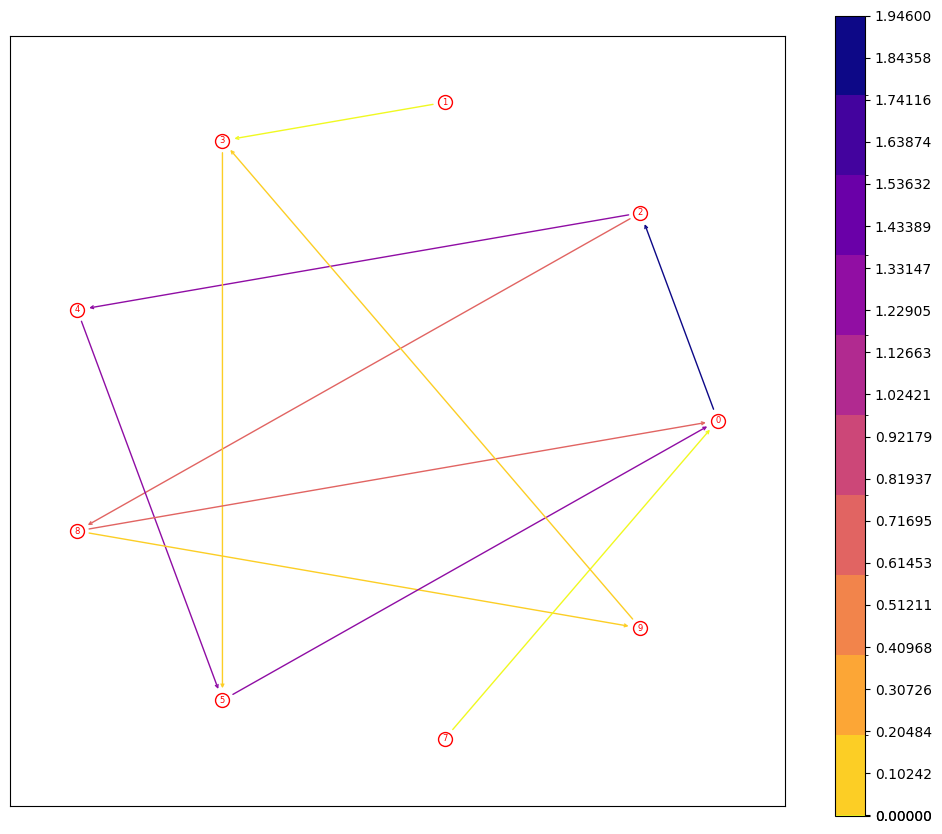

In [126]:
solvingFlow(graph_t3_org, dict_graph_t3_org, 0, 2, 60)


In [12]:
s1, t1, E1 = 0, 2, 60
graph_t3_1, dict_graph_t3_1 = loadSEM(s1, t1, E1, graph_t3_org, dict_graph_t3_org)


In [13]:
len_of_powers1 = powerDivide(dict_graph_t3_1, s1)


In [17]:
for i, v in enumerate(dict_graph_t3_org):
    print(i, v)

# print(list(dict_graph_copy[0]))


0 {5: [23.0, None], 7: [23.0, None], 8: [37.0, None]}
1 {3: [7.0, None]}
2 {4: [18.0, None], 8: [41.0, None]}
3 {1: [7.0, None], 5: [25.0, None], 9: [20.0, None]}
4 {2: [18.0, None], 5: [10.0, None]}
5 {0: [23.0, None], 3: [25.0, None], 4: [10.0, None]}
6 {}
7 {0: [23.0, None]}
8 {0: [37.0, None], 2: [41.0, None], 9: [33.0, None]}
9 {3: [20.0, None], 8: [33.0, None]}


Witam 27.0


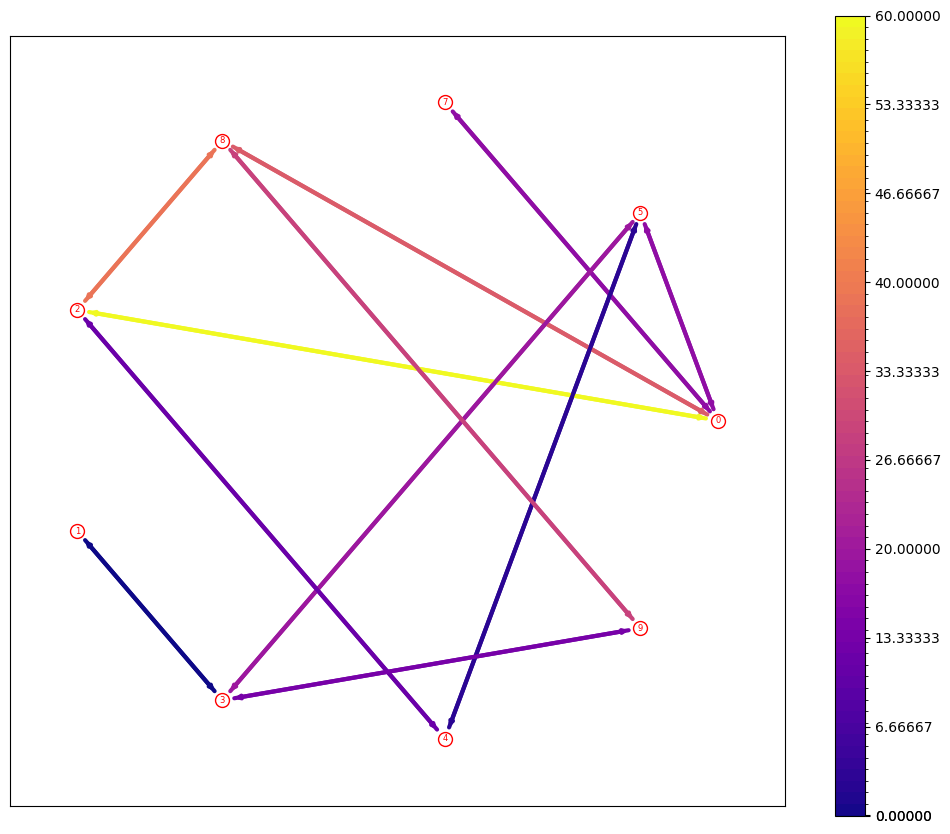

In [14]:
graphToNx(graph_t3_1, s1, t1)


In [15]:
cycles1 = paton(graph_t3_1)


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
[[8, 2, 0], [5, 4, 2, 0], [5, 3, 9, 8, 0]]


Created a matrix with dimensions : amount of basics_cycles + amount of nodes in graph / amount of powers in circuit


In [16]:
c_len = len(cycles1)
n_len = len(dict_graph_t3_1)

matrixX = np.zeros((c_len + n_len, len_of_powers1))
matrixB = np.zeros((c_len + n_len, 1))


Solving equation

In [17]:
to_solveX, to_solveB = fillMatrix(
    cycles1, dict_graph_t3_1, matrixX, matrixB, s1, t1, E1
)


In [20]:
solved = np.linalg.lstsq(to_solveX, to_solveB, rcond=None)[0]


In [21]:
solution_graph1 = solvedGraph(solved, dict_graph_t3_1)


[[[2, 1.9459992737786134]], [[3, 1.0977872257067478e-14]], [[4, 1.1707236864641877], [8, 0.7752755873144181]], [[5, 0.012743130014188742]], [[5, 1.1707236864641877]], [[0, 1.1834668164783804]], [], [[0, 1.3877787807814457e-16]], [[0, 0.7625324573002403], [9, 0.012743130014178011]], [[3, 0.012743130014178011]]]


Drawning solved example

Witam 0.6406318998038711


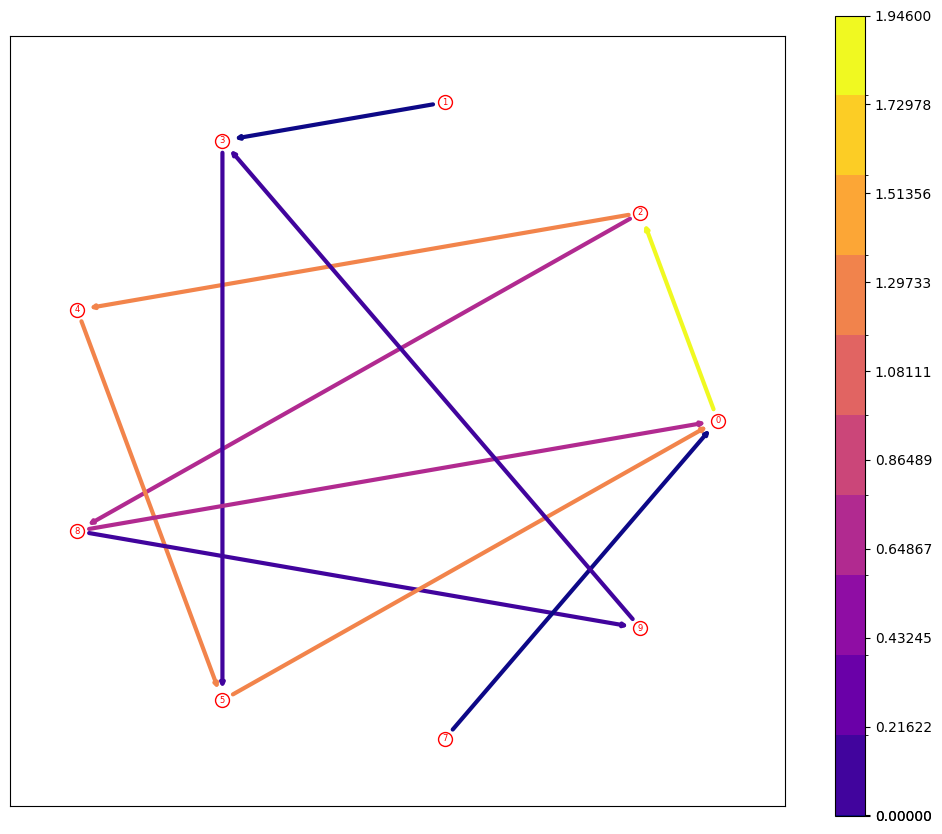

In [22]:
graphToNx(solution_graph1, s1, t1)


Sprawdzanie czy prądy są rozłożone poprawnie

In [23]:
def checkSolution(graph, s, t):
    # suma wychodzących ma się równąc sumie wchodzących
    pass


#### Generowanie odpowiedznich grafów do pliku

1. Connected random graph </br>
Function ```gnpRandomConnectedGraph``` is similar to building random Erdős-Rényi's graph, but as a result it always return connected Erdős-Rényi's graph 

In [13]:
def gnpRandomConnectedGraph(n, edge_value, filename):
    if n < 20:
        p = random.random()
    elif n < 50:
        p = 0.05
    else:
        p = 0.01

    edges = combinations(range(1, n + 1), 2)

    with open(filename, "w") as f:
        print(n, file=f)

        for _, node_edges in groupby(edges, key=lambda x: x[0]):
            node_edges = list(node_edges)
            random_edge = random.choice(node_edges)
            node_edges.remove(random_edge)
            # random_value = np.random.uniform(edge_value)
            print(
                "{} {} {}".format(
                    random_edge[0], random_edge[1], np.random.uniform(edge_value)
                ),
                file=f,
            )

            for e in node_edges:
                if random.random() < p:
                    print(
                        "{} {} {}".format(
                            e[0],
                            e[1],
                            np.random.uniform(edge_value),
                        ),
                        file=f,
                    )
    return


In [67]:
gnpRandomConnectedGraph(200, 10, "cos2.txt")
# nx.draw_networkx(S)


In [110]:
graph2, dict_graph2 = loadGraph("cos2.txt")


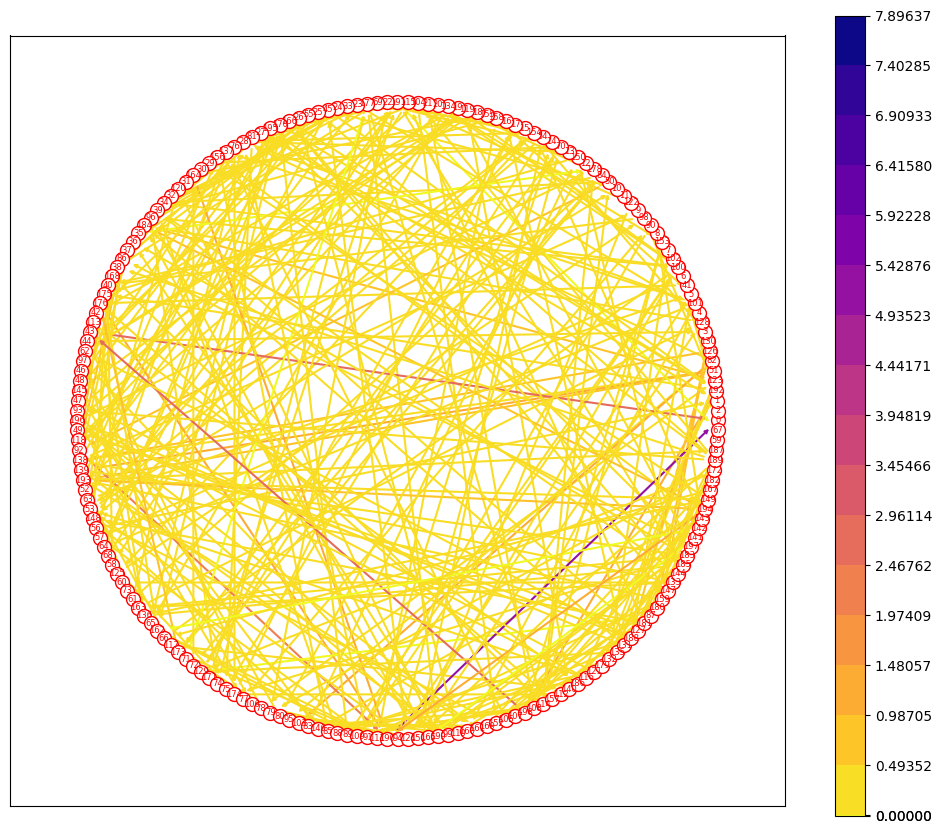

In [111]:
solvingFlow(graph2, dict_graph2, 0, 2, 60)


2. 3-regular graph (known as cubic graph)

In [129]:
def gnpRandomCubicGraph(n, edge_value, filename):
    with open(filename, "w") as f:
        print(n, file=f)

        G = nx.random_regular_graph(3, n)

        edges = G.edges()

        for edge in edges:
            print(
                "{} {} {}".format(
                    edge[0] + 1, edge[1] + 1, np.random.uniform(edge_value)
                ),
                file=f,
            )


In [120]:
gnpRandomCubicGraph(100, 10, "cubic_test.txt")


In [121]:
graph3, dict_graph3 = loadGraph("cubic_test.txt")


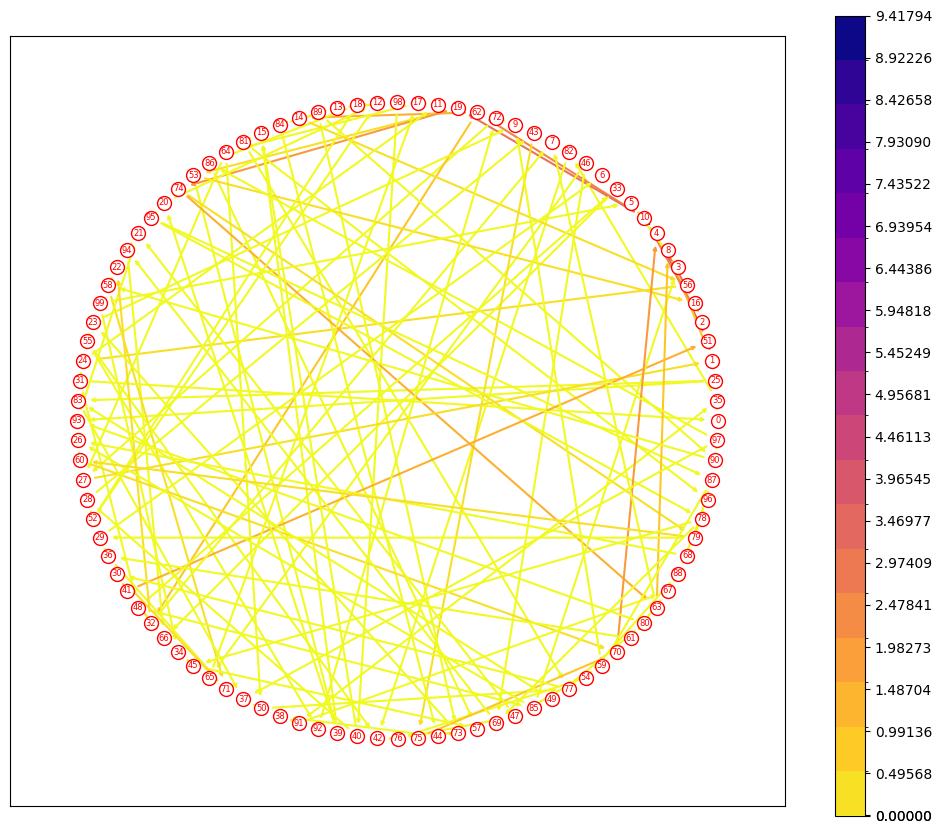

In [172]:
solvingFlow(graph3, dict_graph3, 4, 10, 60)


3. Two random graphs connected with bridge

In [14]:
def gnpRandomGraphWithBridge(n, start_number, edge_value, filename):
    if n < 20:
        p = random.random()
    elif n < 50:
        p = 0.05
    else:
        p = 0.01

    edges1 = combinations(range(1, n + 1), 2)
    edges2 = combinations(range(n + 1, n + start_number), 2)
    edges = [edges1, edges2]

    with open(filename, "w") as f:
        print(n + start_number, file=f)

        for edge in edges:
            for _, node_edges in groupby(edge, key=lambda x: x[0]):
                node_edges = list(node_edges)
                random_edge = random.choice(node_edges)
                node_edges.remove(random_edge)
                # random_value = np.random.uniform(edge_value)
                print(
                    "{} {} {}".format(
                        random_edge[0], random_edge[1], np.random.uniform(edge_value)
                    ),
                    file=f,
                )

                for e in node_edges:
                    if random.random() < p:
                        print(
                            "{} {} {}".format(
                                e[0],
                                e[1],
                                np.random.uniform(edge_value),
                            ),
                            file=f,
                        )
        print(
            "{} {} {}".format(
                random.randint(1, n),
                random.randint(n + 1, n + start_number - 1),
                np.random.uniform(edge_value),
            ),
            file=f,
        )

    return


In [15]:
gnpRandomGraphWithBridge(100, 100, 10, "bridge_test.txt")


In [16]:
graph4, dict_graph4 = loadGraph("bridge_test.txt")


[0, 60, 1, 69, 2, 46, 3, 5, 4, 58, 88, 6, 45, 8, 79, 9, 10, 61, 11, 53, 81, 12, 59, 15, 73, 16, 17, 85, 20, 25, 23, 130, 72, 24, 78, 38, 26, 27, 36, 28, 44, 29, 31, 30, 41, 47, 32, 71, 33, 77, 34, 54, 35, 51, 37, 14, 42, 39, 52, 40, 50, 87, 43, 90, 48, 49, 91, 96, 80, 55, 68, 56, 57, 86, 67, 98, 18, 62, 84, 63, 64, 99, 65, 66, 82, 7, 75, 22, 70, 74, 94, 76, 95, 93, 83, 97, 89, 13, 19, 92, 21, 100, 146, 101, 121, 145, 157, 103, 110, 119, 104, 107, 105, 106, 175, 171, 108, 109, 158, 189, 112, 143, 113, 114, 116, 133, 117, 148, 118, 187, 122, 124, 125, 111, 186, 126, 139, 127, 197, 128, 168, 129, 131, 134, 132, 191, 152, 142, 135, 136, 166, 150, 138, 183, 180, 140, 160, 141, 182, 170, 184, 144, 115, 120, 172, 153, 161, 147, 167, 194, 149, 151, 173, 162, 185, 196, 154, 156, 192, 159, 176, 164, 169, 179, 193, 165, 174, 102, 188, 163, 177, 190, 181, 137, 155, 195, 123, 198, 178]


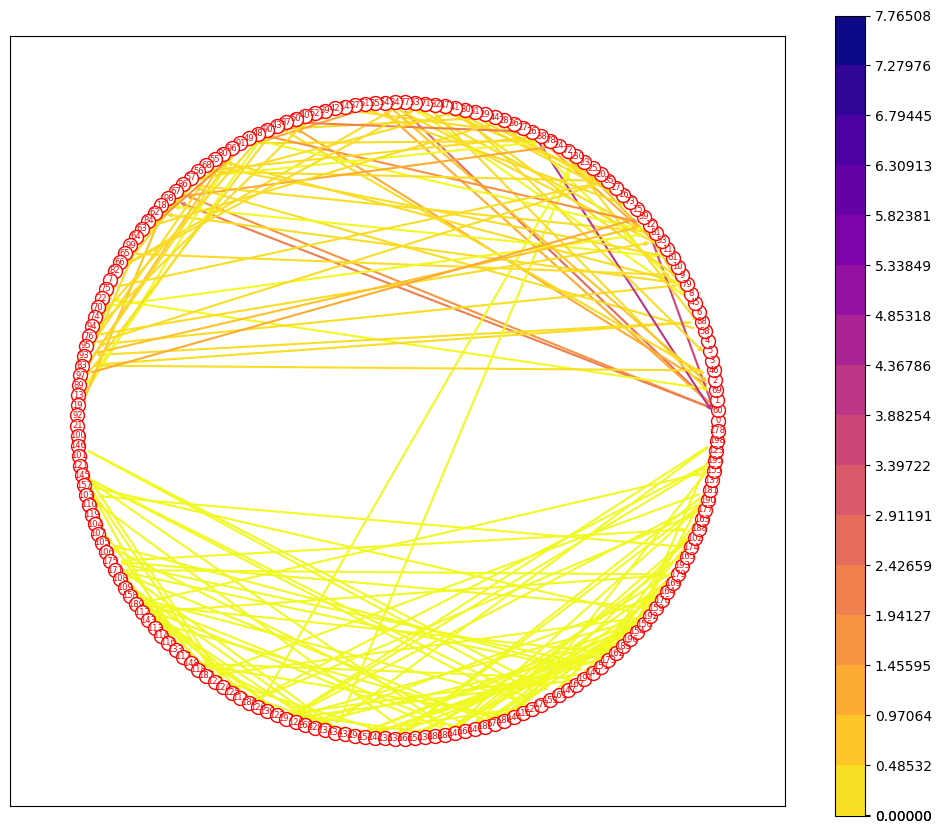

In [17]:
solvingFlow(graph4, dict_graph4, 0, 60, 60)


4. Grid 2d graph

In [19]:
def gnpRandomGridGraph(n, m, edge_value, filename):
    with open(filename, "w") as f:
        print(n*m, file=f)

        G = nx.grid_2d_graph(n, m)
        tab = [[i * m + j for j in range(m)] for i in range(n)]

        edges = G.edges()

        for edge in edges:
            print(
                "{} {} {}".format(
                    tab[edge[0][0]][edge[0][1]] + 1,
                    tab[edge[1][0]][edge[1][1]] + 1,
                    np.random.uniform(edge_value),
                ),
                file=f,
            )
    # for i in tab:
    #     print(i)

In [20]:
gnpRandomGridGraph(50, 2, 10, "grid_test.txt")


In [21]:
graph5, dict_graph5 = loadGraph("grid_test.txt")


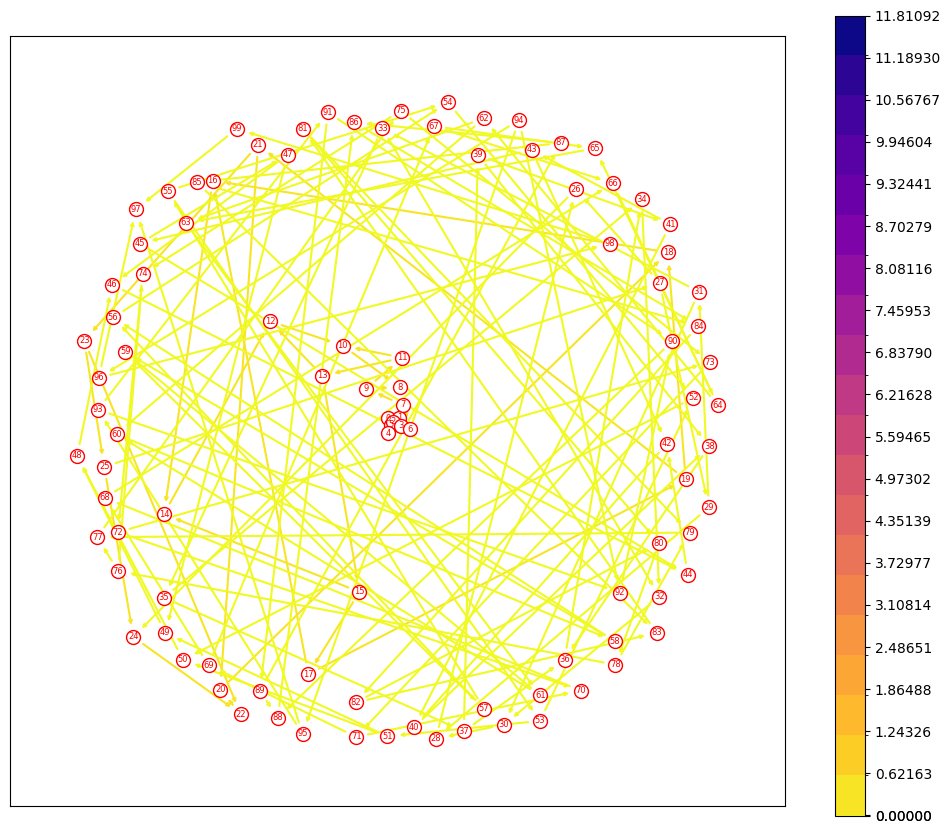

In [100]:
solvingFlow(graph5, dict_graph5, 0, 5, 60, False)


5. Small world generator

In [87]:
def gnpRandomSmallWorldGraph(n, k, p, edge_value, filename):
    with open(filename, "w") as f:
        print(n, file=f)
        G = nx.connected_watts_strogatz_graph(n, k, p)
        edges = G.edges()
        print(G.get_po)

        for edge in edges:
            print(
                "{} {} {}".format(
                    edge[0] + 1, edge[1] + 1, np.random.uniform(edge_value)
                ),
                file=f,
            )
        


In [106]:
gnpRandomSmallWorldGraph(60, 3, 0.3, 100, "small_world_test.txt")

In [107]:
graph6, dict_graph6 = loadGraph("small_world_test.txt")


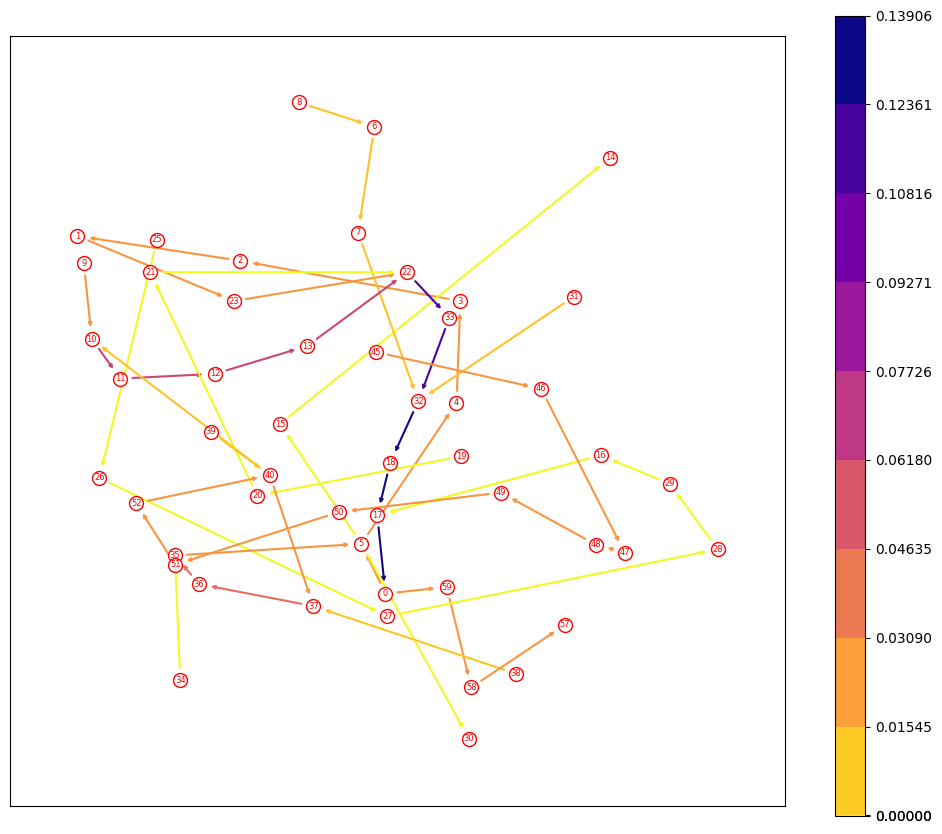

In [108]:
solvingFlow(graph6, dict_graph6, 0, 5, 60, False)